In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv(r"C:\Users\Nscoo\.cache\kagglehub\datasets\jockeroika\life-style-data\versions\7\Final_data.csv")

# Clean column names
df.rename(columns=lambda x: x.strip().replace(" ", "_").replace("(", "").replace(")", ""), inplace=True)
df.fillna(0, inplace=True)

In [22]:
df.rename(columns=lambda x: x.strip().replace(" ", "_").replace("(", "").replace(")", ""), inplace=True)
df.fillna(0, inplace=True)  # replace missing values with 0 for simplicity

## Operational Dashboard – Mid-Manager

**Purpose:**  
This dashboard monitors day-to-day user engagement, session performance, and workout completion, helping managers ensure programs are running effectively.

**Audience:**  
Mid-level managers responsible for tracking user activity, workout adherence, and overall engagement metrics.

**Key KPIs:**  
- **Average Calories Burned per Session:** Measures workout intensity and effectiveness.  
- **Workout Type Distribution:** Shows which workouts are most popular to optimize class offerings.  
- **Average Heart Rate Metrics:** Ensures safe exercise intensity and monitors user health.


Average Calories Burned per Session: 1280.11


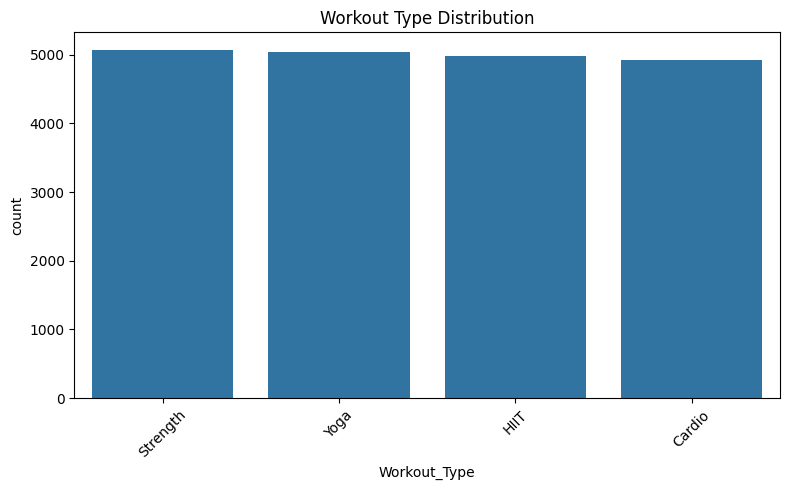

Average BPM: 143.70, Average %MaxHR: 0.80
Average Session Duration (hours): 1.26


In [28]:
# KPI 1: Average Calories Burned
avg_calories = df['Calories_Burned'].mean()
print(f"Average Calories Burned per Session: {avg_calories:.2f}")

# KPI 2: Workout Type Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Workout_Type', order=df['Workout_Type'].value_counts().index)
plt.title("Workout Type Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# KPI 3: Average Heart Rate Metrics
avg_bpm = df['Avg_BPM'].mean()
avg_pct_maxHR = df['pct_maxHR'].mean()
print(f"Average BPM: {avg_bpm:.2f}, Average %MaxHR: {avg_pct_maxHR:.2f}")

# KPI 4: Average Session Duration
avg_session = df['Session_Duration_hours'].mean()
print(f"Average Session Duration (hours): {avg_session:.2f}")


## Executive Dashboard

**Purpose:**  
Provides high-level insights into user demographics, engagement trends, and overall health improvements to guide strategic business decisions.

**Audience:**  
Executives and senior leadership who need to understand the overall performance, growth, and revenue potential of the platform.

**Key KPIs:**  
- **Total Users:** Measures overall growth and platform reach.  
- **Gender Distribution:** Identifies engagement differences across demographics for marketing strategies.  
- **Average Lean Mass by Gender:** Indicates effectiveness of programs on health outcomes.  
- **Average Calorie Balance:** Shows overall user adherence to diet and fitness programs, highlighting potential for upsell or premium features.


Total Users: 20000


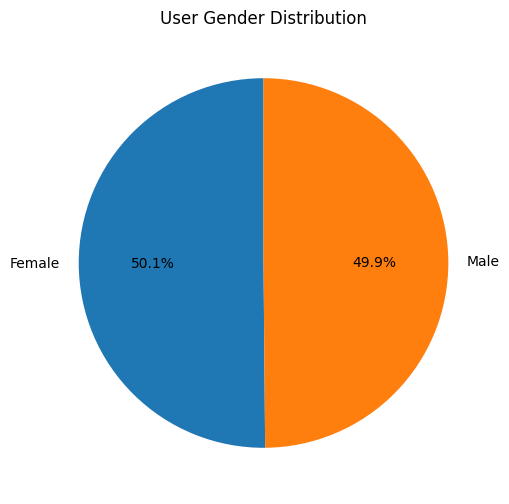

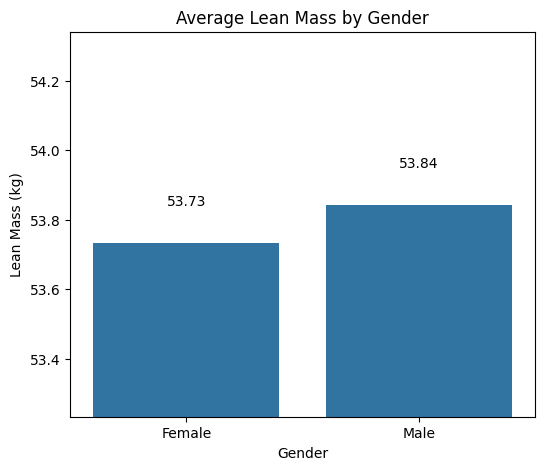

Average Calorie Balance: 744.31


In [32]:
total_users = df.shape[0]
print(f"Total Users: {total_users}")

# Gender Distribution
plt.figure(figsize=(6,6))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("User Gender Distribution")
plt.show()

# Average Lean Mass by Gender - with adjusted y-axis
avg_lean_by_gender = df.groupby('Gender')['lean_mass_kg'].mean().reset_index()
plt.figure(figsize=(6,5))
sns.barplot(data=avg_lean_by_gender, x='Gender', y='lean_mass_kg')
plt.title("Average Lean Mass by Gender")
plt.ylabel("Lean Mass (kg)")
# Set y-axis limits to zoom in on the differences
plt.ylim(avg_lean_by_gender['lean_mass_kg'].min() - 0.5, 
         avg_lean_by_gender['lean_mass_kg'].max() + 0.5)
# Add value labels on bars
for i, v in enumerate(avg_lean_by_gender['lean_mass_kg']):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')
plt.show()

# Average Calorie Balance
avg_cal_balance = df['cal_balance'].mean()
print(f"Average Calorie Balance: {avg_cal_balance:.2f}")

## Custom Dashboard

**Purpose:**  
Explores correlations and trends between user activity, workouts, and calories burned to identify patterns and guide product innovation.

**Audience:**  
Product managers, researchers, or analysts looking for insights to design new features or optimize existing programs.

**Key KPIs:**  
- **Correlation between Session Duration and Calories Burned:** Helps understand how workout length impacts energy expenditure.  
- **Top 5 Workouts by Average Calories Burned:** Identifies the most effective exercises for users.  
- **Avg Session Duration vs Avg BPM by Workout Type:** Tracks exercise intensity and efficiency.  
- **Scatter Plot of Calories Burned vs Session Duration:** Helps discover trends and inform personalized recommendations.


Correlation between Session Duration and Calories Burned: 0.81


C:\Users\Nscoo\AppData\Local\Temp\ipykernel_19272\1305872931.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




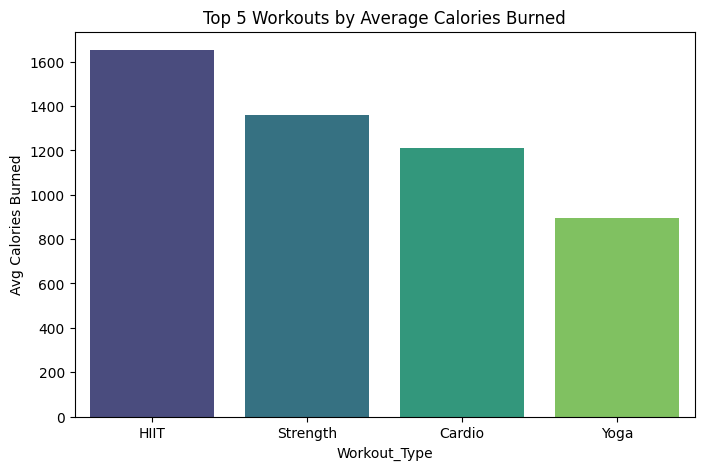

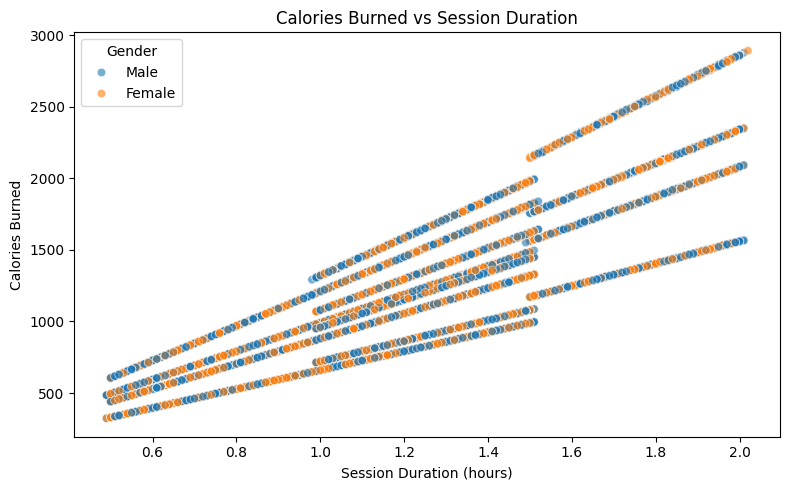

In [30]:
# Correlation
corr = df['Session_Duration_hours'].corr(df['Calories_Burned'])
print(f"Correlation between Session Duration and Calories Burned: {corr:.2f}")

# Top 5 Workouts by Avg Calories Burned
top_workouts = df.groupby('Workout_Type')['Calories_Burned'].mean().sort_values(ascending=False).head(5).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=top_workouts, x='Workout_Type', y='Calories_Burned', palette='viridis')
plt.title("Top 5 Workouts by Average Calories Burned")
plt.ylabel("Avg Calories Burned")
plt.show()

# Scatter plot: Calories vs Session Duration
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Session_Duration_hours', y='Calories_Burned', hue='Gender', alpha=0.6)
plt.title("Calories Burned vs Session Duration")
plt.xlabel("Session Duration (hours)")
plt.ylabel("Calories Burned")
plt.tight_layout()
plt.show()